# Extração Automática e Agrupamento de Palavras-chave em Artigos Científicos Utilizando Mineração de Texto

Autor: Luiz Roberto Albano Junior <luiz.albano@unesp.br>

---

### Instalação de requisitos

**Alerta:** A instalação dos pacotes abaixo pode consumir cerca de 1Gb de espaço.

In [2]:
!pip install bertopic
!python -m spacy download pt_core_news_md


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/Users/lu

### Importação das bibliotecas necessárias

In [1]:
import sqlite3 as db
import pandas as pd
import spacy
from bertopic import BERTopic


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-package

## Coleta de dados

A base de dados de artigos científicos foi obtida a partir da plataforma SciELO Brasil (https://www.scielo.br/). A escolha da plataforma deu-se após pesquisas de datasets contendo dados de artigos científicos. A excassez de um banco de dados confiável e que disponibilizasse o conteúdo destes artigos, fez com que pesquisasse serviços e formas de obter estas informações diretamente nas plataformas.

Após a análise de algumas plataformas, verifiquei a plataforma SciELO possibilitava realizar a coleta dos dados a partir de um script que realizou a "raspagem" dos dados. O download da base utilizada para este trabalho pode ser baixada em:<br>
https://drive.google.com/file/d/1LAfZSNz7AtfgZrbwKm2STH5FBvNBz2u-/view?usp=sharing
<br><br>
Formato: SQLite

O código para raspagem dos dados está dispon;ivel em:<br>
https://github.com/prof-LuizAlbano/unesp-mineracao-dados/blob/analises_luiz/projeto-final-albano/webcrawler-scielo.py

In [2]:
conn = db.connect("dataset/scielo.papers.db")
cur = conn.cursor()

resultset = cur.execute("SELECT * FROM papers WHERE tokens IS NULL")
papers = resultset.fetchall()

## Limpeza e Pré-processamento de Texto (Tokenização)

In [3]:
pln = spacy.load("pt_core_news_md")

Tokenização dos conteúdos

In [7]:
for paper in papers:
    document = pln(paper[7])
    
    tokens = []
    for token in document:
        if token.pos_ == "VERB" and token.is_alpha and not (token.is_stop) :
            tokens.append(str.lower(token.lemma_))
        elif not(token.pos_ == "VERB")  and token.is_alpha and not(token.is_stop) :
            tokens.append(str.lower(token.text))
    
    # Atualiza o registro na tabela
    cur.execute("UPDATE papers SET tokens = ? WHERE ID = ?", (" ".join(tokens), paper[0]))
    conn.commit()

## Agrupamento

Seleção dos dados:

In [4]:
conn = db.connect("dataset/scielo.papers.db")

df = pd.read_sql_query("SELECT * FROM papers ORDER BY RANDOM() LIMIT 1809", conn)
#df = pd.read_sql_query("SELECT * FROM papers", conn)
df.sample()

,ID,Language,Title,Subtitle,Edition,Paper_Year,DOI,Content,Authors,URL,PubDate,tokens
520,3885,pt,"Indústria química: evolução recente, problemas...","Chemical industry: recent developments, proble...",Quím. Nova 30 (6),Dez 2007,https://doi.org/10.1590/S0100-40422007000600008,"Chemical industry: recent developments, probl...","Galembeck,Fernando; Santos,ÁdamoCésarMastrânge...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,chemical industry recent developments problems...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorização com TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["tokens"])

print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1548841 stored elements and shape (1809, 133808)>
  Coords	Values
  (0, 64311)	0.0017817337289149544
  (0, 128986)	0.11710259644038795
  (0, 98875)	0.010734980739386267
  (0, 41755)	0.04068220524777554
  (0, 18903)	0.0029596656073706223
  (0, 32029)	0.010170551311943886
  (0, 99067)	0.007063012911962869
  (0, 22838)	0.008737083630308727
  (0, 127695)	0.008339787659155596
  (0, 101242)	0.003827003732339633
  (0, 127699)	0.006443018035843715
  (0, 3223)	0.008613587667993064
  (0, 99922)	0.0062739259899472636
  (0, 17624)	0.010701233083884957
  (0, 33667)	0.01248852977308483
  (0, 63494)	0.004667076198232777
  (0, 9143)	0.003143486556689408
  (0, 41749)	0.03051165393583165
  (0, 104093)	0.011484462590761175
  (0, 2431)	0.011856316344186255
  (0, 66934)	0.0048682375573578275
  (0, 49132)	0.00793790727550607
  (0, 92977)	0.007898695280669532
  (0, 27747)	0.00652594225210117
  (0, 110553)	0.005838963966228003
  :	:
  (1808, 131256

/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


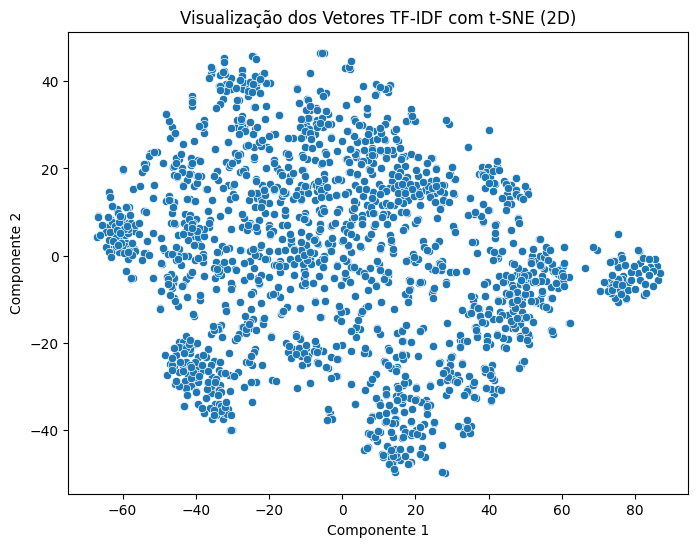

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Redução para 2D com t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Visualização dos vetores TF-IDF em 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1])
plt.title("Visualização dos Vetores TF-IDF com t-SNE (2D)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

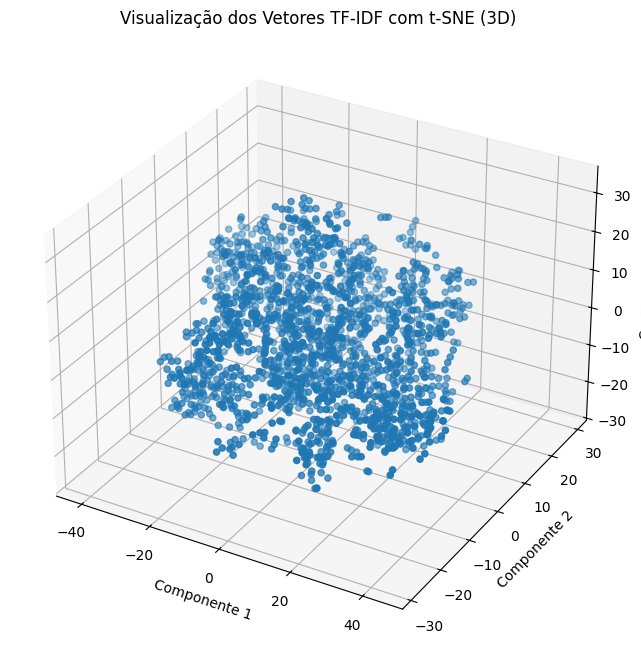

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Redução para 3D com t-SNE
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X.toarray())

# Visualização dos vetores TF-IDF em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2])
ax.set_title("Visualização dos Vetores TF-IDF com t-SNE (3D)")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
plt.show()


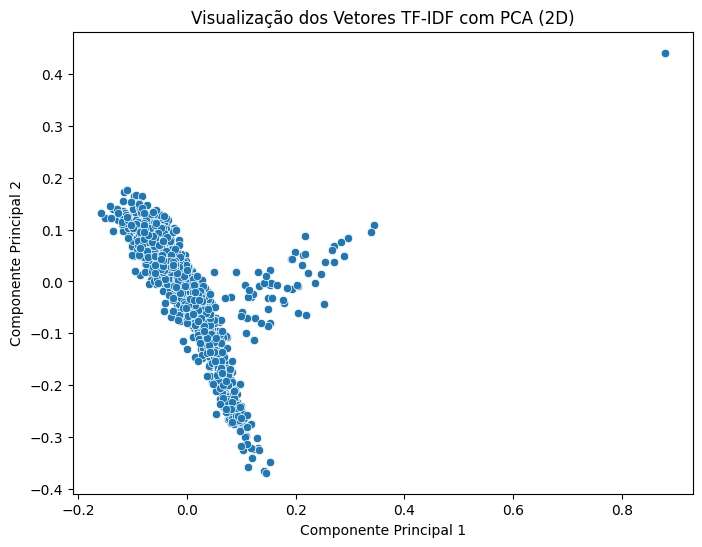

In [8]:
from sklearn.decomposition import PCA

# Redução para 2D com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Visualização dos vetores TF-IDF em 2D com PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title("Visualização dos Vetores TF-IDF com PCA (2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


Aplicação do Algoritmo de Clustering (K-means)


In [12]:
from sklearn.cluster import KMeans

# Definindo o número de clusters (por exemplo, 2)
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)

# Atribuindo os rótulos de cluster ao DataFrame
df["cluster"] = kmeans.labels_

df.sample(20)


,ID,Language,Title,Subtitle,Edition,Paper_Year,DOI,Content,Authors,URL,PubDate,tokens,cluster
1690,2353,pt,Aplicação de métodos quimiométricos na caracte...,Aplication of chemometrics methods in characte...,Quím. Nova 34 (1),2011,https://doi.org/10.1590/S0100-40422011000100011,ARTIGO Aplicação de métodos quimiométricos na...,"Prata,VanessadeMenezes; Emídio,ElissandroSoare...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,artigo aplicação métodos quimiométricos caract...,1
1589,4522,pt,"Um fotômetro multi-led microcontrolado, portát...","A multi-led, microcontrolled, portable and ine...",Quím. Nova 28 (6),Dez 2005,https://doi.org/10.1590/S0100-40422005000600026,NOTA TÉCNICA Um fotômetro multi-led microcont...,"Gaião,EdvaldodaNóbrega; Medeiros,EveraldoPaulo...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,nota técnica fotômetro microcontrolar portátil...,1
1268,3185,pt,"Esteroides produzidos por Penicillium herquei,...","Steroids produced by Penicillium herquei, an e...",Quím. Nova 32 (7),2009,https://doi.org/10.1590/S0100-40422009000700005,ARTIGO Esteroides produzidos por Penicillium ...,"Marinho,AndreyMoacirdoRosario; Marinho,Patríci...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,artigo esteroides produzir penicillium herquei...,1
1084,440,pt,Comparativo de Prognósticos da Velocidade do V...,Wind Speed Forecast Comparison Using WRF Model...,Rev. bras. meteorol. 35 (spe),Oct-Dec 2020,https://doi.org/10.1590/0102-77863550103,1. Introdução De acordo com a World Wind Ener...,"Santos,IwldsonGuilhermedaSilva; Lyra,RobertoFe...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,introdução acordo world wind energy associatio...,0
1622,4805,pt,Estudo teórico da dinâmica da confluência Bras...,,Rev. Bras. Geof. 22 (2),Ago 2004,https://doi.org/10.1590/S0102-261X2004000200006,Estudo teórico da dinâmica da confluência Bra...,"Francisco,CayoPradoFernandes; Silveira,IlsonCa...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,estudo teórico dinâmica confluência cayo prado...,0
59,2076,pt,Desenvolvimento e uso do compósito de Nb2O5|Cu...,Development of Nb2O5|Cu composite as AISI 1020...,Quím. Nova 35 (8),2012,https://doi.org/10.1590/S0100-40422012000800005,ARTIGO Desenvolvimento e uso do compósito de ...,"RegisJunior,Oscar; Silva,JoséMaurílioda; Porte...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,artigo desenvolvimento uso compósito revestime...,1
1532,5377,pt,Detecção de cavidades em arenitos utilizando g...,Detection of cavities in sandstone using gravi...,Rev. Bras. Geof. 19 (1),Abr 2001,https://doi.org/10.1590/S0102-261X2001000100002,RESEARCH ARTICLE Detecção de cavidades em are...,"Dourado,JoãoC.; MalaguttiFilho,Walter; Braga,A...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,research article detecção cavidades arenitos u...,0
166,314,pt,Desempenho de Métodos de Preenchimento de Falh...,Performance of filling gaps in reference evapo...,Rev. bras. meteorol. 36 (3),Jul-Sep 2021,https://doi.org/10.1590/0102-77863630001,1. Introdução A evapotranspiração é a perda d...,"Giovanella,TharsosHister; Oliveira,FabrícioCor...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,introdução evapotranspiração perda água vapor ...,0
1053,561,pt,CONVERSÃO FOTOELETROCATALÍTICA DE CO2 E BIOGÁS...,PHOTOELECTROCATALYTIC CONVERSION OF CO2 AND BI...,Quím. Nova 43 (2),Fev 2020,https://doi.org/10.21577/0100-4042.20170463,INTRODUÇÃO A conversão de dióxido de carbono ...,"Bresciani,Laís; Vognach,Letícia; Lagemann,Carl...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,introdução conversão dióxido carbono emitir at...,1
111,2768,pt,Métodos para determinação de atividade antioxi...,Methods for determination of in vitro antioxid...,Quím. Nova 33 (10),2010,https://doi.org/10.1590/S0100-40422010001000033,REVISÃO Métodos para determinação de atividad...,"Alves,ClaytonQ.; David,JorgeM.; David,JuceniP....",http://www.scielo.br/scielo.php?script

Visualizaçào dos Clusters

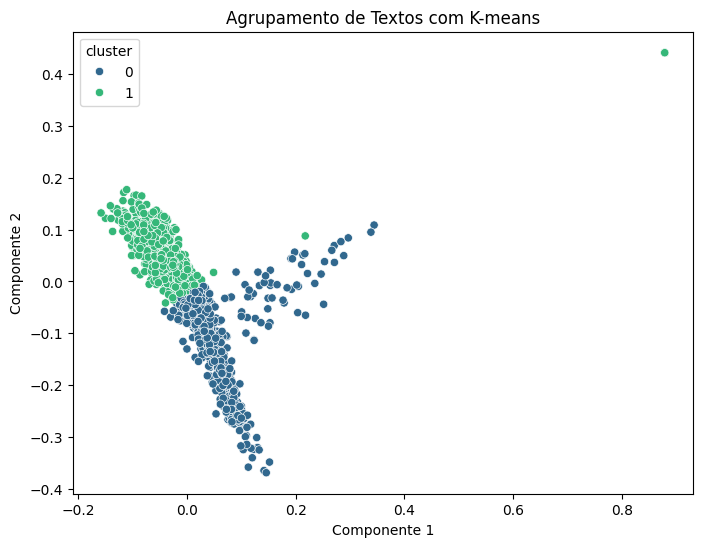

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adiciona os componentes reduzidos ao DataFrame para visualização
df["Componente 1"] = X_pca[:, 0]
df["Componente 2"] = X_pca[:, 1]

# Visualiza os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Componente 1", y="Componente 2", hue="cluster", palette="viridis")
plt.title("Agrupamento de Textos com K-means")
plt.show()


Agrupamento com DBSCAN


In [14]:
from sklearn.cluster import DBSCAN

# Configurando DBSCAN (eps define a distância máxima para formar um cluster)
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_pca)

# Adicionando os rótulos ao DataFrame
df["cluster_dbscan"] = dbscan_labels
df.sample(20)


,ID,Language,Title,Subtitle,Edition,Paper_Year,DOI,Content,Authors,URL,PubDate,tokens,cluster,Componente 1,Componente 2,cluster_dbscan
1715,551,pt,AVALIAÇÃO DE ADITIVOS DE FASE MÓVEL E TEMPERAT...,EVALUATION OF MOBILE PHASE ADDITIVES AND TEMPE...,Quím. Nova 43 (3),Mar 2020,https://doi.org/10.21577/0100-4042.20170482,INTRODUÇÃO O desenvolvimento científico e tec...,"Gomes,KátiaA.; Santos,AllysonL.R.; Faria,Anizi...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,introdução desenvolvimento científico tecnológ...,1,-0.086879,0.094680,0
1010,2062,pt,Antocianinas em extratos vegetais: aplicação e...,Anthocyanins in natural extracts: application ...,Quím. Nova 35 (8),2012,https://doi.org/10.1590/S0100-40422012000800030,NOTA TÉCNICA Antocianinas em extratos vegetai...,"Guimarães,Wesson; Alves,MariaIsabelRibeiro; An...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,nota técnica antocianinas extratos vegetais ap...,1,-0.084165,0.114693,0
534,1480,pt,Concepções de licenciandos em química sobre vi...,Preservice chemistry teachers' beliefs about v...,Quím. Nova 37 (3),Jun 2014,https://doi.org/10.5935/0100-4042.20140090,EDUCAÇÃO Concepções de licenciandos em químic...,"Vries,MauritzGregóriode; Ferreira,Celeste; Arr...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,educação concepções licenciandos química visua...,0,0.011052,-0.048881,0
1161,3973,pt,Usando redes neurais diretas e regras de produ...,,Sba Controle & Automação 18 (3),Set 2007,https://doi.org/10.1590/S0103-17592007000300003,SISTEMAS INTELIGENTES Usando redes neurais di...,"Martins,L.G.A.; Monteiro,L.H.A..",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,sistemas inteligentes usando redes neurais dir...,0,0.004397,-0.038183,0
727,2564,pt,Paleocanais no megaleque do rio Taquari: mapea...,"Paleochannels on Taquari river megafan, Pantan...",Rev. Bras. Geociênc. 41 (01),Jan-Mar 2011,https://doi.org/10.25249/0375-7536.20114113743,Texto completo disponível apenas em PDF. Full...,"Zani,Hiran; Assine,MarioLuis.",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,texto completo disponível pdf full text availa...,1,0.878350,0.440693,1
1108,2659,pt,Determinação colorimétrica de metabissulfito,,Eclet. Quím. 35 (3),Set 2010,https://doi.org/10.1590/S0100-46702010000300013,ARTIGO Determinação colorimétrica de metabiss...,"SilvaJunior,Humbertoda; Freitas,GuttoRaffysonS...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,artigo determinação colorimétrica metabissulfi...,1,-0.053238,0.069721,0
665,3887,pt,As secretarias regionais e as divisões científ...,The Regional Secretaries and the Scientific Di...,Quím. Nova 30 (6),Dez 2007,https://doi.org/10.1590/S0100-40422007000600012,As secretarias regionais e as divisões cientí...,"Moro,CelsoCamilo; Lopes,NorbertoPeporine; Roch...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,secretarias regionais divisões científicas soc...,0,0.042064,-0.037435,0
1744,3197,pt,Líquido iônico [bmim.PF6] como solvente: um me...,Ionic liquid [bmim.PF6]: a convenient solvent ...,Quím. Nova 32 (7),2009,https://doi.org/10.1590/S0100-40422009000700040,NOTA TÉCNICA Líquido iônico [bmim.PF6] como s...,"Bertoti,AdaRuth; Netto-Ferreira,JoséCarlos.",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,nota técnica líquido iônico bmim solvente conv...,1,-0.022357,0.038852,0
735,4303,pt,Determinação simultânea de resíduos de cloranf...,Simultaneous determination of chloroamphenicol...,Quím. Nova 29 (5),Out 2006,https://doi.org/10.1590/S0100-40422006000500008,ARTIGO Determinação simultânea de resíduos de...,"Pezza,Leonardo; Ríos,Àngel; Nozal,Leonor; Arce...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,artigo determinação simultânea resíduos cloran...,1,-0.062181,0.071404,0
552,2522,pt,Ações de divulgação de química na Casa da Desc...,Actions regarding the dissemination of chemist...,Quím. Nova 34 (10),2011,https://doi.org/10.1590/S0100-40422011001000022,ASSUNTOS GE